<a href="https://colab.research.google.com/github/onlyreynaldo/python-clustering-data/blob/main/Regr_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Linear Simples

In [2]:
import pandas as pd

In [3]:
pasta_raiz = '/content/drive/My Drive/datasets'

In [5]:
df = pd.read_csv(f'{pasta_raiz}/base_pulmao.csv')
df.head()

,taxa_fluxo_expiratorio,qtde_anos_exposto
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [6]:
df.describe()

,taxa_fluxo_expiratorio,qtde_anos_exposto
count,122.000000,122.000000
mean,365.655738,14.081967
std,105.132641,6.959850
min,110.000000,0.000000
25%,300.000000,7.000000
50%,365.000000,17.000000
75%,430.000000,20.000000
max,610.000000,23.000000


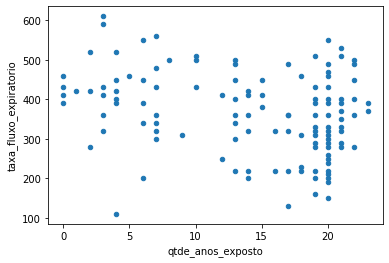

In [10]:
%matplotlib inline 
#se utiliza para versiones anteriores, en los mas nuevos no es necesario, era para decir a Jupiter renderizar su imagen
df.plot(kind='scatter', x='qtde_anos_exposto', y='taxa_fluxo_expiratorio')

In [11]:
X = df['qtde_anos_exposto'].copy()
y = df['taxa_fluxo_expiratorio'].copy()

In [13]:
import statsmodels.api as sm

In [14]:
X = sm.add_constant(X)

In [16]:
X.head()

,const,qtde_anos_exposto
0,1.0,0
1,1.0,0
2,1.0,0
3,1.0,0
4,1.0,1


In [17]:
modelo_rls = sm.regression.linear_model.OLS(y, X).fit()
# .fit para executar la instancia, hasta la parte de OLS(y, X) instancia para guardarlo en memoria

In [20]:
print(modelo_rls.summary());

                              OLS Regression Results                              
Dep. Variable:     taxa_fluxo_expiratorio   R-squared:                       0.077
Model:                                OLS   Adj. R-squared:                  0.069
Method:                     Least Squares   F-statistic:                     9.974
Date:                    Tue, 03 Nov 2020   Prob (F-statistic):            0.00201
Time:                            23:11:46   Log-Likelihood:                -735.68
No. Observations:                     122   AIC:                             1475.
Df Residuals:                         120   BIC:                             1481.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [21]:
print(modelo_rls.summary2())

                    Results: Ordinary least squares
Model:              OLS                    Adj. R-squared:     0.069    
Dependent Variable: taxa_fluxo_expiratorio AIC:                1475.3501
Date:               2020-11-03 23:14       BIC:                1480.9581
No. Observations:   122                    Log-Likelihood:     -735.68  
Df Model:           1                      F-statistic:        9.974    
Df Residuals:       120                    Prob (F-statistic): 0.00201  
R-squared:          0.077                  Scale:              10290.   
------------------------------------------------------------------------
                       Coef.   Std.Err.    t    P>|t|   [0.025   0.975] 
------------------------------------------------------------------------
const                 424.5828  20.7960 20.4165 0.0000 383.4081 465.7575
qtde_anos_exposto      -4.1846   1.3250 -3.1582 0.0020  -6.8079  -1.5612
------------------------------------------------------------------------

In [22]:
# outra forma de fazer a regressao linear
import statsmodels.formula.api as smf

modelo = smf.ols('taxa_fluxo_expiratorio ~ qtde_anos_exposto', data=df).fit()
print(modelo.summary())

                              OLS Regression Results                              
Dep. Variable:     taxa_fluxo_expiratorio   R-squared:                       0.077
Model:                                OLS   Adj. R-squared:                  0.069
Method:                     Least Squares   F-statistic:                     9.974
Date:                    Tue, 03 Nov 2020   Prob (F-statistic):            0.00201
Time:                            23:52:22   Log-Likelihood:                -735.68
No. Observations:                     122   AIC:                             1475.
Df Residuals:                         120   BIC:                             1481.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------